In [1]:
 # Data Preprocessing

In [2]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
train_dir = r'F:\CNN\reass\course resources\cats_and_dogs_small\train'
test_dir =  r'F:\CNN\reass\course resources\cats_and_dogs_small\test'
valid_dir =  r'F:\CNN\reass\course resources\cats_and_dogs_small\validation'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator (rescale = 1./255)
test_datagen = ImageDataGenerator (rescale = 1./255 )
train_generator = train_datagen.flow_from_directory(
   train_dir ,
    target_size= (150,150) ,
    batch_size = 20 ,
    class_mode = 'binary'
)
validation_generator = train_datagen.flow_from_directory(
   test_dir ,
    target_size= (150,150) ,
    batch_size = 20 ,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Training the Model

In [6]:
from tensorflow.keras import layers
from tensorflow.keras import models 


In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu' , input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3) ,activation = 'relu' ))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu' ))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu' ))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512 , activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [11]:
from tensorflow.keras import optimizers
model.compile(loss = 'binary_crossentropy',
            optimizer =  optimizers.RMSprop(lr = 1e-4),
              metrics = ['acc'])
             

In [12]:
history =model.fit_generator(train_generator , steps_per_epoch = 100 ,
                             epochs = 20 ,
                            validation_data = validation_generator ,
                             validation_steps = 50
                            )

Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
100/100 [==============================] - 97s 971ms/step - loss: 0.6886 - acc: 0.5305 - val_loss: 0.6968 - val_acc: 0.5080
Epoch 2/20
100/100 [==============================] - 94s 940ms/step - loss: 0.6548 - acc: 0.6150 - val_loss: 0.6535 - val_acc: 0.6010
Epoch 3/20
100/100 [==============================] - 91s 910ms/step - loss: 0.6126 - acc: 0.6560 - val_loss: 0.6275 - val_acc: 0.6500
Epoch 4/20
100/100 [==============================] - 99s 992ms/step - loss: 0.5623 - acc: 0.7130 - val_loss: 0.5802 - val_acc: 0.6970
Epoch 5/20
100/100 [==============================] - 87s 873ms/step - loss: 0.5321 - acc: 0.7380 - val_loss: 0.5938 - val_acc: 0.6860
Epoch 6/20
100/100 [==============================] - 81s 805ms/step - loss: 0.5029 - acc: 0.7525 - val_loss: 0.5769 - val_acc: 0.7030
Epoch 7/20
100/100 [==============================] - 84s 841ms/step - loss: 0.4883 - acc: 0.764

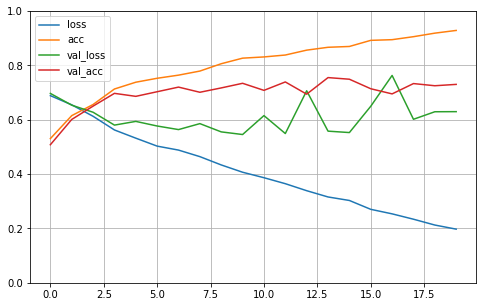

In [13]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [14]:
model.save('modelk.h5')